In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
os.chdir('/mnt/d/Analysis/Apsi_data/')

In [3]:
class_if = pd.read_table('Apsi.classif', sep='\t', header=None)

In [4]:
class_if.columns = ['ID', 'Len', 'strand', 'Status', 'Class', 'Order', 'Status2', 'Info']

In [5]:
class_SSR = class_if[class_if['Order'] == 'SSR']
class_other = class_if[class_if['Order'] != 'SSR']

In [6]:
class_other

ID    Len strand  \
0                     RLX-incomp-chim_MR_P2A_100Mb_RS_1  20015      +   
1                         DTX-incomp_MR_P2A_100Mb_RS_10  10498      +   
2                        RLX-incomp_MR_P2A_100Mb_RS_100   2059      .   
13              RLX-incomp_MR_P2A_100Mb_RS_101_reversed   2054      -   
24                            noCat_MR_P2A_100Mb_RS_102   2038      .   
...                                                 ...    ...    ...   
5762           RLX-incomp-chim_MR_P2A_300Mb-L-B997-Map1  11959      +   
5763       RLX-incomp_MR_P2A_300Mb-L-B998-Map1_reversed  11953      -   
5764  RLX-incomp-chim_MR_P2A_300Mb-L-B999-Map1_reversed  11948      -   
5765   RLX-incomp-chim_MR_P2A_300Mb-L-B99-Map1_reversed  23156      -   
5766          XXX-chim_MR_P2A_300Mb-L-B9-Map10_reversed  12659      -   

                 Status  Class          Order     Status2  \
0     PotentialChimeric      I            LTR  incomplete   
1                    ok     II            TIR  incomplete   
2                    ok      I            LTR  incomplete   
13                   ok      I            LTR  incomplete   
24                   ok  noCat          noCat         NaN   
...                 ...    ...            ...         ...   
5762  PotentialChimeric      I            LTR  incomplete   
5763                 ok      I            LTR  incomplete   
5764  PotentialChimeric      I            LTR  incomplete   
5765  PotentialChimeric      I            LTR  incomplete   
5766  PotentialChimeric  noCat  DIRS|Maverick         NaN   

                                                   Info  
0     CI=35; coding=(TE_BLRtx: Gypsy-104_MLP-I:Class...  
1     CI=87; coding=(TE_BLRtx: EnSpm-2_PGr:ClassII:T...  
2     CI=14; coding=(TE_BLRx: Gypsy-54_MLP-I_1p:Clas...  
13    CI=28; coding=(TE_BLRtx: Copia-20_PGr-I:ClassI...  
24                     CI=NA; struct=(SSRCoverage=0.26)  
...                                                 ...  
5762  CI=35; coding=(TE_BLRtx: Gypsy-7_PSt-I:ClassI:...  
5763  CI=50; coding=(TE_BLRtx: Gypsy-1_Trm-I:ClassI:...  
5764  CI=50; coding=(TE_BLRtx: Gypsy-17_PGr-I:ClassI...  
5765  CI=28; coding=(TE_BLRtx: Gypsy-12_CCO-I:ClassI...  
5766  CI=25; coding=(TE_BLRx: Gypsy-1_Trm-I_2p:Class...  

[5473 rows x 8 columns]

In [9]:
new_classifications = pd.DataFrame()
for TE_id in class_if['ID']:
    tmp = class_if[class_if['ID'] == TE_id]
    #If Class is not noCat
    info = tmp['Info'].values[0]
    #If info contain 'coding'
    pattern = r'([^:\s]+(?::[^:\s]+){3}:\s*(\d+\.\d+)%)'
    coding = re.findall(pattern, info)
    #If coding is empty, return info
    if len(coding) > 0:
        reclass_df = pd.DataFrame()
        for match in re.findall(pattern, info):
            reclass_df = pd.concat([reclass_df, pd.DataFrame([match], columns=['TE', 'perc'])])
        reclass_df['perc'] = reclass_df['perc'].astype(float)
        reclass_df['TE'] = reclass_df['TE'].apply(lambda x: x.rsplit(':', 4))
        reclass_df['TE_family'] = reclass_df['TE'].apply(lambda x: x[0])
        reclass_df['TE_class'] = reclass_df['TE'].apply(lambda x: x[1])
        reclass_df['TE_order'] = reclass_df['TE'].apply(lambda x: x[2])
        reclass_df['TE_superfamily'] = reclass_df['TE'].apply(lambda x: x[3])
        #If the perc is higher than 60% and is the highest perc, return the classification
        if reclass_df['perc'].max() > 60:
            tmp['superfamily'] = reclass_df[reclass_df['perc'] == reclass_df['perc'].max()]['TE_superfamily'].values[0]
            tmp['Class'] = reclass_df[reclass_df['perc'] == reclass_df['perc'].max()]['TE_class'].values[0]
            tmp['Order'] = reclass_df[reclass_df['perc'] == reclass_df['perc'].max()]['TE_order'].values[0]
            tmp['update']= 'Yes'
        else:
            tmp['superfamily'] = 'noCat'
            tmp['update'] = 'No'
        
    else:
        tmp['superfamily'] = 'noCat'
        tmp['update'] = 'No'
        
    new_classifications = pd.concat([new_classifications, tmp])

/tmp/ipykernel_277976/2343620212.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['superfamily'] = reclass_df[reclass_df['perc'] == reclass_df['perc'].max()]['TE_superfamily'].values[0]
/tmp/ipykernel_277976/2343620212.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Class'] = reclass_df[reclass_df['perc'] == reclass_df['perc'].max()]['TE_class'].values[0]
/tmp/ipykernel_277976/2343620212.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [7]:
class_SSR = class_SSR[['ID', 'Class', 'Order']]
class_SSR['superfamily'] = 'SSR'
class_SSR['Class'] = 'SSR'
class_SSR['update'] = 'No'

In [10]:
class_reclass = new_classifications[['ID', 'Class', 'Order', 'superfamily', 'update']]
class_reclass = pd.concat([class_reclass, class_SSR])
#Drop duplicate ID
class_reclass = class_reclass.drop_duplicates(subset='ID')

In [11]:
class_reclass['Class'] = class_reclass['Class'].replace('ClassI', 'I')
class_reclass['Class'] = class_reclass['Class'].replace('ClassII', 'II')
for i in class_reclass['ID']:
    #If superfamily is noCat, replace with Order
    if class_reclass[class_reclass['ID'] == i]['superfamily'].values[0] == 'noCat' and class_reclass[class_reclass['ID'] == i]['Order'].values[0] != 'SSR':
        superfamily = 'unknown ' + class_reclass[class_reclass['ID'] == i]['Order'].values[0]
        class_reclass.loc[class_reclass['ID'] == i, 'superfamily'] = superfamily
    if class_reclass[class_reclass['ID'] == i]['Order'].values[0] == 'SSR':
        class_reclass.loc[class_reclass['ID'] == i, 'superfamily'] = 'SSR'


In [12]:
class_reclass['superfamily'] = class_reclass['superfamily'].replace('unknown noCat', 'unclassified')
class_reclass['superfamily'] = class_reclass['superfamily'].replace('unknown', 'unclassified')

In [13]:
#Split by the first '_' and keep the rest of the string
class_reclass['ID'] = class_reclass['ID'].apply(lambda x: x.split('_', 1)[1])
class_reclass

ID Class Order  superfamily update
0                     MR_P2A_100Mb_RS_1     I   LTR        Gypsy    Yes
1                    MR_P2A_100Mb_RS_10    II   TIR        CACTA    Yes
2                   MR_P2A_100Mb_RS_100     I   LTR  unknown LTR     No
3                  MR_P2A_100Mb_RS_1000   NaN   SSR          SSR     No
4                  MR_P2A_100Mb_RS_1001   NaN   SSR          SSR     No
...                                 ...   ...   ...          ...    ...
5762           MR_P2A_300Mb-L-B997-Map1     I   LTR        Gypsy    Yes
5763  MR_P2A_300Mb-L-B998-Map1_reversed     I   LTR  unknown LTR     No
5764  MR_P2A_300Mb-L-B999-Map1_reversed     I   LTR  unknown LTR     No
5765   MR_P2A_300Mb-L-B99-Map1_reversed     I   LTR        Gypsy    Yes
5766   MR_P2A_300Mb-L-B9-Map10_reversed     I   LTR        Gypsy    Yes

[5767 rows x 5 columns]

In [14]:
#If 'unknown' is in Order or superfamily, replace the value with '?' for whole cell
class_reclass_2 = class_reclass.copy()
class_reclass_2['Class'] = class_reclass_2['Class'].apply(lambda x: '?' if isinstance(x, str) and  any(substring in x for substring in ['unknown', 'noCat', 'unclassified']) else x)
class_reclass_2['Order'] = class_reclass_2['Order'].apply(lambda x: '?' if any(substring in x for substring in ['unknown', 'noCat', 'unclassified']) else x)
class_reclass_2['superfamily'] = class_reclass_2['superfamily'].apply(lambda x: '?' if any(substring in x for substring in ['unknown', 'noCat', 'unclassified']) else x)
class_reclass_2['new_name'] = 'Class ' + class_reclass_2['Class'] + ':' + class_reclass_2['Order'] + ':' + class_reclass_2['superfamily']
class_reclass_2['new_name'] = class_reclass_2['new_name'].fillna('SSR')

In [15]:
class_reclass_2

ID Class Order superfamily update  \
0                     MR_P2A_100Mb_RS_1     I   LTR       Gypsy    Yes   
1                    MR_P2A_100Mb_RS_10    II   TIR       CACTA    Yes   
2                   MR_P2A_100Mb_RS_100     I   LTR           ?     No   
3                  MR_P2A_100Mb_RS_1000   NaN   SSR         SSR     No   
4                  MR_P2A_100Mb_RS_1001   NaN   SSR         SSR     No   
...                                 ...   ...   ...         ...    ...   
5762           MR_P2A_300Mb-L-B997-Map1     I   LTR       Gypsy    Yes   
5763  MR_P2A_300Mb-L-B998-Map1_reversed     I   LTR           ?     No   
5764  MR_P2A_300Mb-L-B999-Map1_reversed     I   LTR           ?     No   
5765   MR_P2A_300Mb-L-B99-Map1_reversed     I   LTR       Gypsy    Yes   
5766   MR_P2A_300Mb-L-B9-Map10_reversed     I   LTR       Gypsy    Yes   

                new_name  
0      Class I:LTR:Gypsy  
1     Class II:TIR:CACTA  
2          Class I:LTR:?  
3                    SSR  
4                    SSR  
...                  ...  
5762   Class I:LTR:Gypsy  
5763       Class I:LTR:?  
5764       Class I:LTR:?  
5765   Class I:LTR:Gypsy  
5766   Class I:LTR:Gypsy  

[5767 rows x 6 columns]

In [16]:
TE_bed = pd.read_table('Au3_TE.bed', sep='\t', header=None)
TE_bed.columns = ['chr', 'start', 'end', 'Div', 'strand', 'phase', 'hit']
TE_bed['hit']= TE_bed['hit'].str.split(':').str[1]

In [17]:
TE_bed['hit'] = TE_bed['hit'].fillna('').apply(lambda x: x.split('_', 2)[-1] if len(x.split('_', 2)) > 2 else 'TandemRepeat')

In [18]:
#Merge the TE_bed and class_reclass by hit
TE_bed_class = pd.merge(TE_bed, class_reclass_2, left_on='hit', right_on='ID', how='left')


In [19]:
#If hit is TandemRepeat, replace the superfamily with TandemRepeat
TE_bed_class['new_name'] = TE_bed_class.apply(lambda row: 'TR' if row['hit'] == 'TandemRepeat' else row['new_name'], axis=1)
TE_bed_class

chr     start         end   Div strand phase  \
0        Chr01A         2     10118.0   0.1      +     .   
1        Chr01A     11363     11663.0  23.7      +     .   
2        Chr01A     11836     12032.0  16.4      +     .   
3        Chr01A     11861     12030.0   7.7      +     .   
4        Chr01A     12007     12150.0  19.4      -     .   
...         ...       ...         ...   ...    ...   ...   
2146012  Chr18B  26468955  26469569.0  14.9      +     .   
2146013  Chr18B  26469027  26471931.0  16.8      +     .   
2146014  Chr18B  26471912  26472005.0  27.2      -     .   
2146015  Chr18B  26471926  26472443.0   9.7      -     .   
2146016  Chr18B  26472445  26484131.0   0.1      +     .   

                                       hit                                 ID  \
0                             TandemRepeat                                NaN   
1                MR_P2A_300Mb-L-B5666-Map1          MR_P2A_300Mb-L-B5666-Map1   
2        MR_P2A_300Mb-L-B739-Map1_reversed  MR_P2A_300Mb-L-B739-Map1_reversed   
3                MR_P2A_300Mb-L-B3932-Map1          MR_P2A_300Mb-L-B3932-Map1   
4                 MR_P2A_300Mb-L-B230-Map1           MR_P2A_300Mb-L-B230-Map1   
...                                    ...                                ...   
2146012          MR_P2A_300Mb-L-B1249-Map1          MR_P2A_300Mb-L-B1249-Map1   
2146013           MR_P2A_300Mb-L-B474-Map1           MR_P2A_300Mb-L-B474-Map1   
2146014           MR_P2A_300Mb-L-B591-Map1           MR_P2A_300Mb-L-B591-Map1   
2146015          MR_P2A_300Mb-L-B1489-Map1          MR_P2A_300Mb-L-B1489-Map1   
2146016                       TandemRepeat                                NaN   

        Class    Order superfamily update           new_name  
0         NaN      NaN         NaN    NaN                 TR  
1           I     LARD           ?     No     Class I:LARD:?  
2           ?  LTR|TIR           ?     No  Class ?:LTR|TIR:?  
3           I      LTR       Gypsy    Yes  Class I:LTR:Gypsy  
4          II      TIR           ?     No     Class II:TIR:?  
...       ...      ...         ...    ...                ...  
2146012     I     LARD           ?     No     Class I:LARD:?  
2146013    II      TIR           ?     No     Class II:TIR:?  
2146014     I      LTR       Copia    Yes  Class I:LTR:Copia  
2146015     I      LTR       Gypsy    Yes  Class I:LTR:Gypsy  
2146016   NaN      NaN         NaN    NaN                 TR  

[2146017 rows x 13 columns]

In [20]:
#If have order and class, replace the superfamily with order, if no order, replace with class
TE_bed_class['superfamily'] = TE_bed_class.apply(lambda row: f'unclassified {row["Order"]}' if row['Order'] == '?' else row['superfamily'], axis=1)
TE_bed_class['superfamily'] = TE_bed_class.apply(lambda row: f'unclassified {row["Class"]}' if row['Order'] == '?' else row['superfamily'], axis=1)

In [26]:
TE_bed_class['new_name'] = TE_bed_class['new_name'].replace('Class II:Helitron:?', 'Class II:Helitron:Helitron')

In [27]:
TE_bed_class['new_name'].unique()

array(['TR', 'Class I:LARD:?', 'Class ?:LTR|TIR:?', 'Class I:LTR:Gypsy',
       'Class II:TIR:?', 'Class I:LTR:?', 'Class II:TIR:Tc1-Mariner',
       'Class ?:?:?', 'Class II:TIR:CACTA', 'Class II:Maverick:?',
       'Class I:LTR:Copia', 'Class I:DIRS:?', 'Class II:TIR:MuDR',
       'Class II:TIR:hAT', 'Class I:LINE:?', 'Class II:Helitron:Helitron',
       'Class I:TRIM:?', 'SSR', 'Class II:?:?', 'Class II:MITE:?',
       'Class II:TIR:PIF-Harbinger', 'Class I:LINE:I',
       'Class I:LTR|DIRS:?', 'Class I:SINE:?', 'Class ?:DIRS|TIR:?',
       'Class ?:DIRS|Maverick:?', 'Class I:?:?'], dtype=object)

In [33]:
TE_bed_class.to_csv("/mnt/c/Users/lzy55/OneDrive - Australian National University/Scripts_backup/Apsi_genome_project/data/TE/Reclass_apsi_TE.csv",index=False)

ID    Len strand  \
0                     RLX-incomp-chim_MR_P2A_100Mb_RS_1  20015      +   
1                         DTX-incomp_MR_P2A_100Mb_RS_10  10498      +   
2                        RLX-incomp_MR_P2A_100Mb_RS_100   2059      .   
3                              SSR_MR_P2A_100Mb_RS_1000     84      .   
4                              SSR_MR_P2A_100Mb_RS_1001     84      .   
...                                                 ...    ...    ...   
5762           RLX-incomp-chim_MR_P2A_300Mb-L-B997-Map1  11959      +   
5763       RLX-incomp_MR_P2A_300Mb-L-B998-Map1_reversed  11953      -   
5764  RLX-incomp-chim_MR_P2A_300Mb-L-B999-Map1_reversed  11948      -   
5765   RLX-incomp-chim_MR_P2A_300Mb-L-B99-Map1_reversed  23156      -   
5766          XXX-chim_MR_P2A_300Mb-L-B9-Map10_reversed  12659      -   

                 Status  Class          Order     Status2  \
0     PotentialChimeric      I            LTR  incomplete   
1                    ok     II            TIR  incomplete   
2                    ok      I            LTR  incomplete   
3                    ok    NaN            SSR         NaN   
4                    ok    NaN            SSR         NaN   
...                 ...    ...            ...         ...   
5762  PotentialChimeric      I            LTR  incomplete   
5763                 ok      I            LTR  incomplete   
5764  PotentialChimeric      I            LTR  incomplete   
5765  PotentialChimeric      I            LTR  incomplete   
5766  PotentialChimeric  noCat  DIRS|Maverick         NaN   

                                                   Info  
0     CI=35; coding=(TE_BLRtx: Gypsy-104_MLP-I:Class...  
1     CI=87; coding=(TE_BLRtx: EnSpm-2_PGr:ClassII:T...  
2     CI=14; coding=(TE_BLRx: Gypsy-54_MLP-I_1p:Clas...  
3     CI=100; struct=(TElength: <100bps; SSRCoverage...  
4     CI=100; struct=(TElength: <100bps; SSRCoverage...  
...                                                 ...  
5762  CI=35; coding=(TE_BLRtx: Gypsy-7_PSt-I:ClassI:...  
5763  CI=50; coding=(TE_BLRtx: Gypsy-1_Trm-I:ClassI:...  
5764  CI=50; coding=(TE_BLRtx: Gypsy-17_PGr-I:ClassI...  
5765  CI=28; coding=(TE_BLRtx: Gypsy-12_CCO-I:ClassI...  
5766  CI=25; coding=(TE_BLRx: Gypsy-1_Trm-I_2p:Class...  

[5767 rows x 8 columns]

In [42]:
#Get the sum of the length of each TE class by superfamily
TE_bed_class['length'] = TE_bed_class['end'] - TE_bed_class['start']
TE_bed_class['length'] = TE_bed_class['length'].abs()
TE_bed_class_summed = TE_bed_class.groupby(['new_name', 'chr'])['length'].sum().reset_index()

In [43]:
TE_bed_class_summed

new_name     chr    length
0    Class ?:?:?  Chr01A  547900.0
1    Class ?:?:?  Chr01B  536810.0
2    Class ?:?:?  Chr02A  574912.0
3    Class ?:?:?  Chr02B  612688.0
4    Class ?:?:?  Chr03A  598427.0
..           ...     ...       ...
956           TR  Chr16B  285120.0
957           TR  Chr17A  285405.0
958           TR  Chr17B  226348.0
959           TR  Chr18A  242977.0
960           TR  Chr18B  237528.0

[961 rows x 3 columns]

In [44]:
genome_size = pd.read_table('Au3.genome.size', sep=' ', header=None)
genome_size.columns = ['chr', 'size']

In [49]:
#merge the genome size with the TE_bed_class_summed
TE_bed_class_summed_size = pd.merge(TE_bed_class_summed, genome_size, on='chr', how='left')
TE_bed_class_summed_size['Cov'] = TE_bed_class_summed_size['length']*100 / TE_bed_class_summed_size['size']

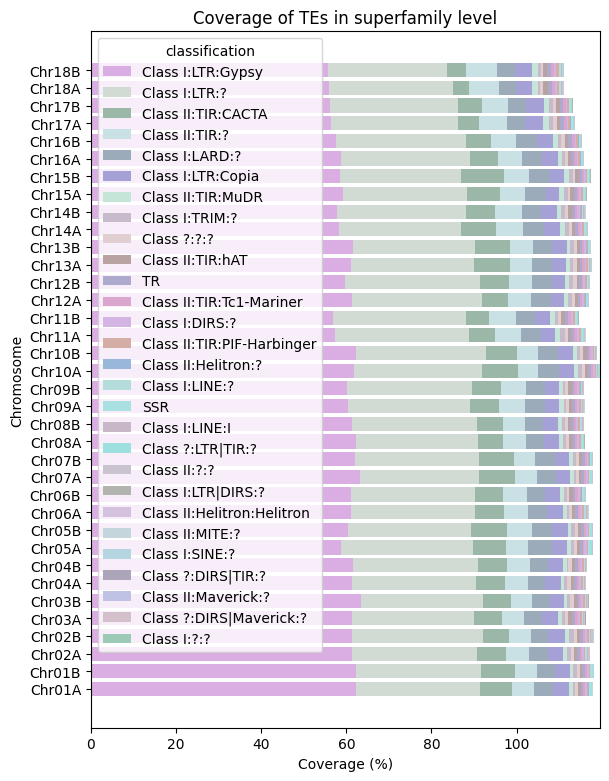

In [76]:
plt.figure(figsize=(6, 7.5))
from matplotlib import rcParams
rcParams['svg.fonttype'] = 'none'


#Drop TE_bed_class_summed_size which contain '#' in the chr
TE_bed_class_summed_size = TE_bed_class_summed_size[~TE_bed_class_summed_size['chr'].str.contains('#')]
chromosomes = TE_bed_class_summed_size['chr'].unique()
bottom = np.zeros(len(chromosomes))
#sort by chromosome then sort by coverage
TE_bed_class_summed_size = TE_bed_class_summed_size.sort_values(by=['chr', 'Cov'], ascending=[True, False])
#set different color for each superfamily
from matplotlib import cm
import random
unique_names = TE_bed_class_summed_size['new_name'].unique()

# Generate muted colors by limiting the RGB range to a softer spectrum
def generate_muted_color():
    return (random.uniform(0.6, 0.9), random.uniform(0.6, 0.9), random.uniform(0.6, 0.9))

colors = dict(zip(unique_names, [generate_muted_color() for _ in range(len(unique_names))]))

bottom = [0] * len(chromosomes)  # Ensure the length matches the number of chromosomes

for superfamily in TE_bed_class_summed_size['new_name'].unique():
    # Filter data for the current superfamily
    tmp = TE_bed_class_summed_size[TE_bed_class_summed_size['new_name'] == superfamily]
    tmp = tmp.set_index('chr').reindex(chromosomes, fill_value=0).reset_index()
    
    # Use barh for horizontal stacking
    plt.barh(
        tmp['chr'],  # Swap x-axis (now y-axis) to chromosome
        tmp['Cov'],  # Swap y-axis (now x-axis) to coverage
        left=bottom,  # Use `left` instead of `bottom` for horizontal stacking
        label=superfamily,
        color=colors[superfamily]
    )
    # Update the bottom for the next superfamily
    bottom = [b + c for b, c in zip(bottom, tmp['Cov'].values)]
    
plt.legend(  # Place the legend outside the plot
    loc='upper right',          # Align it to the top left
    fontsize='small',          # Adjust font size for readability
    title="Classification",    # Add a title to the legend (optional)
)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
#plt.xticks(rotation=90)
plt.legend(title='classification')
plt.xlabel('Coverage (%)')
plt.ylabel('Chromosome')
plt.title('Coverage of TEs in superfamily level')
plt.savefig("TE_cov.svg", format="svg", bbox_inches="tight")
plt.show()


In [59]:
unique_names = TE_bed_class_summed_size['new_name'].unique()

# Generate a continuous colormap with enough distinct colors
colormap = cm.get_cmap('hsv', len(unique_names))  # 'hsv' is a vibrant continuous colormap

# Map each unique name to a color
colors = dict(zip(unique_names, [colormap(i) for i in range(len(unique_names))]))
colors

/tmp/ipykernel_16966/3372617359.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv', len(unique_names))  # 'hsv' is a vibrant continuous colormap


{'Class I:LTR:Gypsy': (1.0, 0.0, 0.0, 1.0),
 'Class I:LTR:?': (1.0, 0.21875021875021874, 0.0, 1.0),
 'Class II:TIR:CACTA': (1.0, 0.4375004375004375, 0.0, 1.0),
 'Class II:TIR:?': (1.0, 0.6562506562506563, 0.0, 1.0),
 'Class I:LARD:?': (1.0, 0.875000875000875, 0.0, 1.0),
 'Class I:LTR:Copia': (0.9062489062489064, 1.0, 0.0, 1.0),
 'Class II:TIR:MuDR': (0.6874986874986876, 1.0, 0.0, 1.0),
 'Class I:TRIM:?': (0.46874846874846876, 1.0, 0.0, 1.0),
 'Class ?:?:?': (0.24999824999824993, 1.0, 0.0, 1.0),
 'Class II:TIR:hAT': (0.03124934374934372, 1.0, 1.3125013125552403e-06, 1.0),
 'TR': (0.0, 1.0, 0.18750139999257986, 1.0),
 'Class II:TIR:Tc1-Mariner': (0.0, 1.0, 0.4062502406237246, 1.0),
 'Class I:DIRS:?': (0.0, 1.0, 0.6249990812548694, 1.0),
 'Class II:TIR:PIF-Harbinger': (0.0, 1.0, 0.8437479218860142, 1.0),
 'Class II:Helitron:?': (0.0, 0.9375028437528434, 1.0, 1.0),
 'Class I:LINE:?': (0.0, 0.7187526250026247, 1.0, 1.0),
 'SSR': (0.0, 0.500002406252406, 1.0, 1.0),
 'Class I:LINE:I': (0.0, 0

In [22]:
TE_bed_class_summed_size

superfamily     chr     length        size       Cov
0           CACTA  Chr01A  6620625.0  85591751.0  7.735120
1           CACTA  Chr01B  6729043.0  81879591.0  8.218218
2           CACTA  Chr02A  6104469.0  84617575.0  7.214186
3           CACTA  Chr02B  5270451.0  83031777.0  6.347511
4           CACTA  Chr03A  5234049.0  76987749.0  6.798548
..            ...     ...        ...         ...       ...
944  unknown TRIM  Chr16B   254029.0  35082462.0  0.724091
945  unknown TRIM  Chr17A   290887.0  28021773.0  1.038075
946  unknown TRIM  Chr17B   288544.0  30262541.0  0.953469
947  unknown TRIM  Chr18A   186245.0  27535891.0  0.676372
948  unknown TRIM  Chr18B   182715.0  26484131.0  0.689904

[949 rows x 5 columns]